In [1]:
%load_ext autoreload
%autoreload 2
import os
os.environ["GEOMSTATS_BACKEND"] = "pytorch"
import geomstats.backend as gs
import matplotlib.pyplot as plt
import torch

INFO: Using pytorch backend


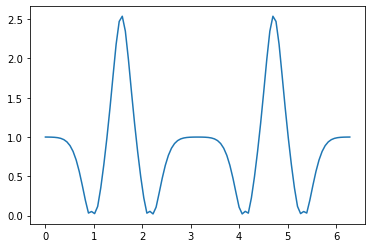

In [2]:
from datasets.synthetic import get_s1_synthetic_immersion as get_immersion
from main_eval import compute_mean_curvature

immersion = get_immersion(distortion_func="bump",radius=1,n_wiggles=3,distortion_amp=0.3,embedding_dim=2,rot=torch.eye(2))
points = gs.linspace(0,2*gs.pi,100)

mean_curvatures = gs.zeros((len(points), 2))
mean_curvature_norms = gs.zeros(len(points))
for i_point, point in enumerate(points):
    point = gs.array([[point]])
    curvature, norm = compute_mean_curvature(point, immersion, 1, 2)
    mean_curvatures[i_point] = gs.squeeze(curvature)
    mean_curvature_norms[i_point] = gs.squeeze(norm)

plt.plot(points, mean_curvature_norms);

In [30]:
from datasets.synthetic import load_s1_synthetic

data, labels = load_s1_synthetic(rot=torch.eye(2), n_times=100, radius=1, distortion_amp=0.2, embedding_dim=2, noise_var=1e-3)

torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Size([2])
torch.Si

In [5]:
from main_eval import get_second_fundamental_form as sff

In [77]:
def get_immersion(radius):    
    def immersion(theta):
        return radius*gs.array([gs.cos(theta), gs.sin(theta)])
    return immersion

def get_sphere_immersion(radius):
    def immersion(point):
        theta = point[0]
        phi = point[1]
        x = gs.sin(theta)*gs.cos(phi)
        y = gs.sin(theta)*gs.sin(phi)
        z = gs.cos(theta)
        return radius*gs.array([x,y,z])
    return immersion

dim = 2
embedding_dim = 3

point = gs.array([gs.pi/3,gs.pi])

point = gs.array([0.1,0.0])

immersion = get_sphere_immersion(radius=1)


sec_fun = sff(immersion,point,dim,embedding_dim)

tensor([0.1000, 0.0000])
torch.Size([2])
tensor([[1.0000, 0.0000],
        [0.0000, 0.0100]])


In [37]:
from datasets.synthetic import get_s1_synthetic_immersion as get_immersion
from main_eval import compute_mean_curvature

immersion = get_immersion(distortion_func="bump",radius=1,n_wiggles=3,distortion_amp=0.3,embedding_dim=2,rot=torch.eye(2))
points = gs.linspace(0,2*gs.pi,100)

mean_curvatures = gs.zeros((len(points),2))
mean_curvature_norms = gs.zeros(len(points))
for _, point in enumerate(points):
    point = gs.array([[point]])
    curvature, norm = compute_mean_curvature(point, immersion, 1, 2)
    mean_curvatures[_,:] =  torch.squeeze(curvature)
    mean_curvature_norms[_] = norm

In [208]:
from datasets.synthetic import get_s2_synthetic_immersion
from main_eval import compute_mean_curvature

immersion = get_s2_synthetic_immersion(radius=1,distortion_amp=0.4,embedding_dim=3,rot=torch.eye(3))

thetas = gs.linspace(0.01,gs.pi,80)
phis = gs.linspace(0,2*gs.pi,80)

points = torch.cartesian_prod(thetas,phis)


mean_curvatures = gs.zeros((len(points),3))

mean_curvature_norms = gs.zeros(len(points))

for _, point in enumerate(points):
    point = gs.array([point])
    curvature, norm = compute_mean_curvature(point,immersion, 2, 3)
    mean_curvatures[_,:] =  torch.squeeze(curvature)
    mean_curvature_norms[_] = norm

In [154]:
angles=points

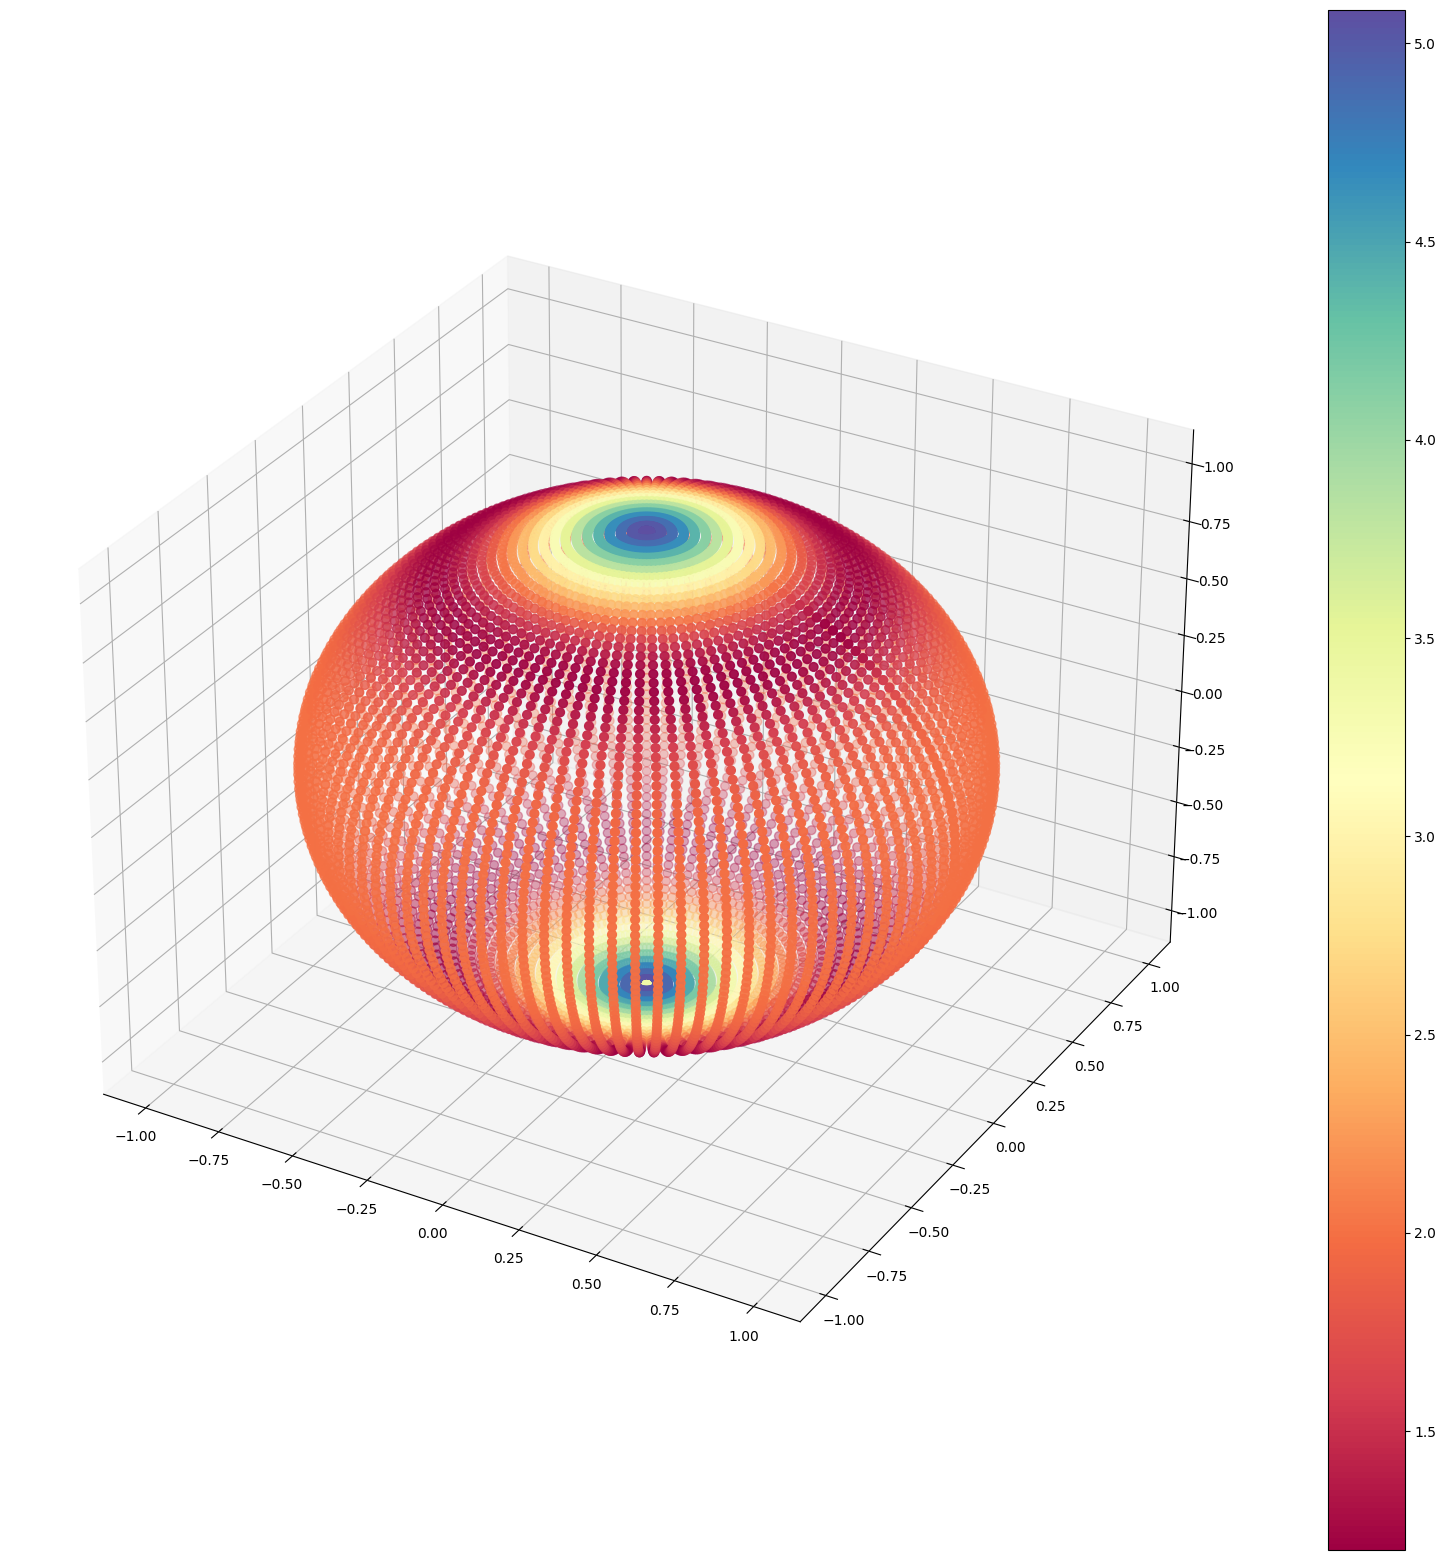

In [193]:
x = [np.sin(angle[0])*np.cos(angle[1]) for angle in angles]
y = [np.sin(angle[0])*np.sin(angle[1]) for angle in angles]
z = [np.cos(angle[0]) for angle in angles]

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(111,projection="3d")
sc = ax.scatter3D(x,y,z,s=40,c=mean_curvature_norms,cmap="Spectral")

plt.colorbar(sc)

In [135]:
A = torch.ones_like(mean_curvature_norms)

In [145]:


sum_phis = torch.zeros_like(thetas)
for t, theta in enumerate(thetas):
  sum_phis[t] = torch.trapz(y=A[len(phis)*t:len(phis)*(t+1)],x=phis)*np.sin(theta)
      

integral = torch.trapz(y=sum_phis,x=thetas)


In [166]:
from main_eval import integrate_sphere

A = torch.ones(10000)

I = integrate_sphere(thetas,phis,A)

In [167]:
print(I)

tensor(12.5650)


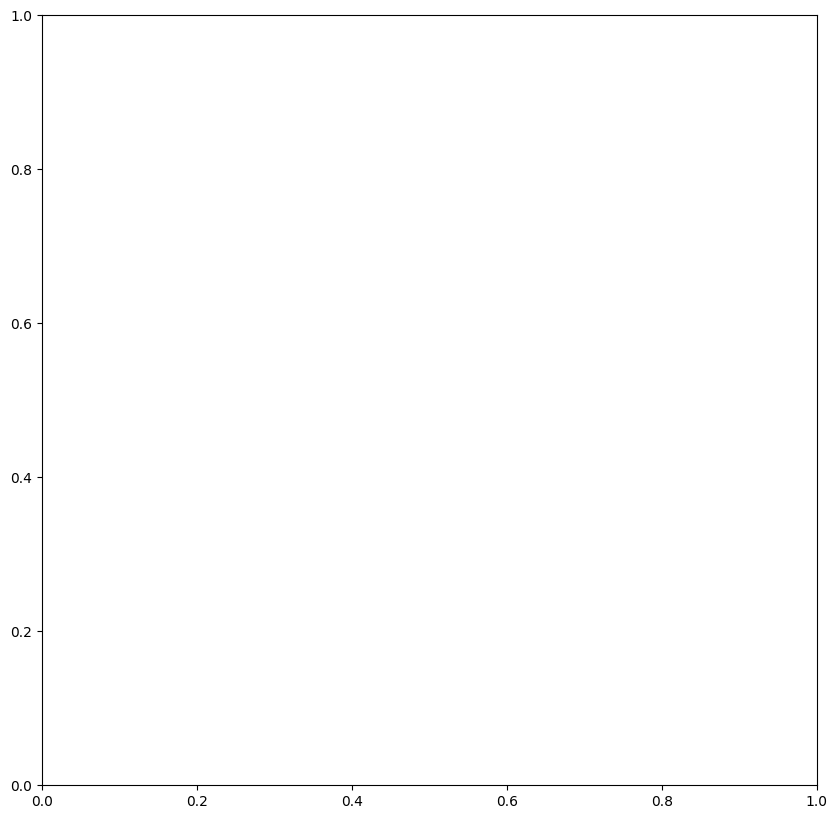

In [174]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

noise_var = [0.001,0.005,0.01,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.075,0.08,0.09,0.1,0.125]



error = [0.0038236,0.00393826,0.0082392,0.013263643, 0.018831209,0.023393472,0.026830469,0.028257823,0.026462683,0.029377216,0.029433391,0.036400927,0.032171806,0.029818693,0.036835936]


std = [0.00255255,0.00162342,0.00494583,0.005526395,0.015162444,0.013581833,0.011809724,0.010161061,0.01691731,0.009538343,0.004111763,0.006278068,0.00807038,0.010022126,0.00662975]

std = std/np.sqrt(5)

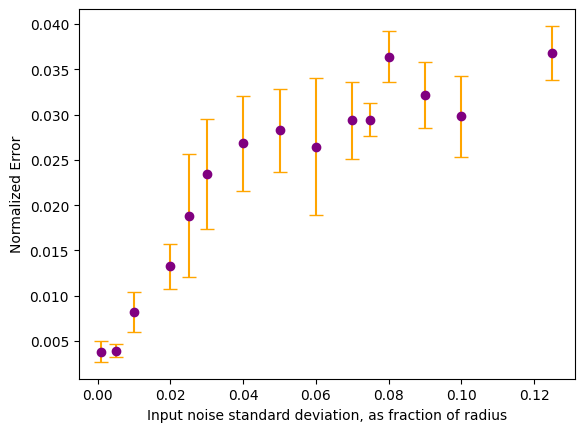

In [188]:
plt.errorbar(x=noise_var,y=error,yerr=std,fmt="o",ecolor="orange",capsize=5, color="purple")
plt.xlabel("Input noise standard deviation, as fraction of radius")
plt.ylabel("Normalized Error")

plt.savefig("est_theory.svg")

In [ ]:
latitude_prof = torch.zeros_like()

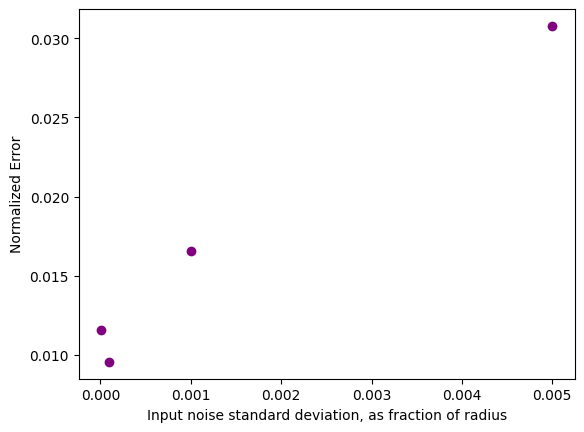

In [195]:
noises2 = [0.00001, 0.0001,0.001,0.005]

errors2 = [0.01159, 0.009555,0.01655,0.03078]

plt.scatter(noises2,errors2,color="purple")

plt.xlabel("Input noise standard deviation, as fraction of radius")
plt.ylabel("Normalized Error")

plt.savefig("est_theorys2.svg")

In [213]:
latitude = torch.zeros_like(thetas)

for t in range(len(thetas)):
    latitude[t] = mean_curvature_norms[len(phis)*t] 


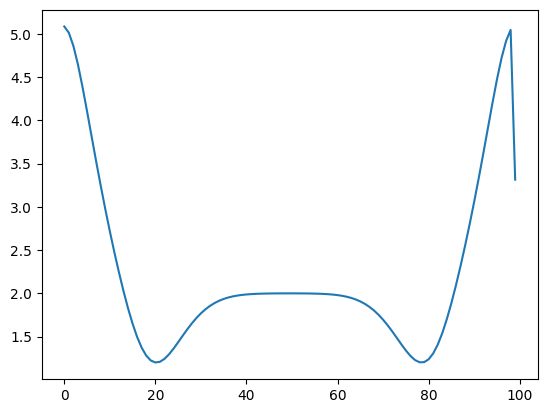

In [200]:
plt.plot(latitude)

In [202]:
from main_eval import get_model_immersion
from main_eval import compute_mean_curvature
import default_config as config

model = torch.load("/Users/franciscoacosta/Desktop/code/neuralgeom/neuralgeom/results/trained_models/s2_synthetic_2022-09-25 13:34:00_model.pt")



immersion = get_model_immersion(model, config)
mean_curvature, mean_curvature_norms = compute_mean_curvature(points,immersion=immersion,dim=2,embedding_dim=3)

In [203]:
mean_learned = mean_curvature_norms

In [210]:
latitude = torch.zeros(80)

for t in range(len(thetas)):
    latitude[t] = mean_curvature_norms[80*t+3] 

In [211]:
latitude_learned = latitude

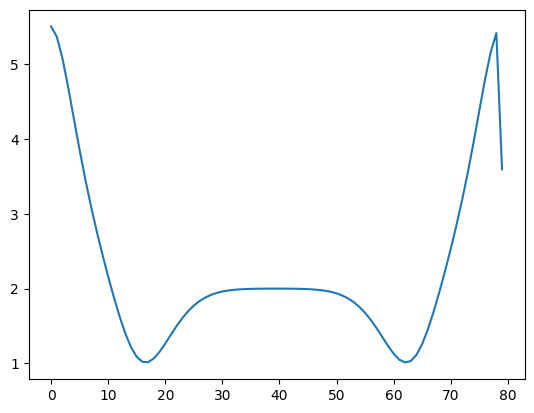

In [212]:
plt.plot(latitude_learned)

In [214]:
ed = [2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

error_ed = [0.001689126,
0.001012303,
0.002482807,
0.001903473,
0.002538689,
0.002346822,
0.00185122,
0.002858928,
0.001734209,
0.004227371,
0.003866927,
0.0020231,
0.001000167,
0.001913845,
0.002814295,
0.002451746,
0.00226067,
0.003887875,
0.00125866,
0.000970031,
0.001079341,
0.003844655]

Text(0, 0.5, 'Normalized Error')

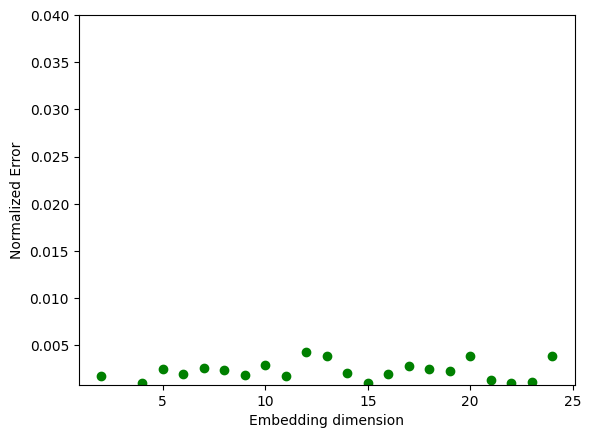

In [216]:
plt.scatter(ed,error_ed, color="green")
plt.ylim(top=0.04)
plt.xlabel("Embedding dimension")
plt.ylabel("Normalized Error")

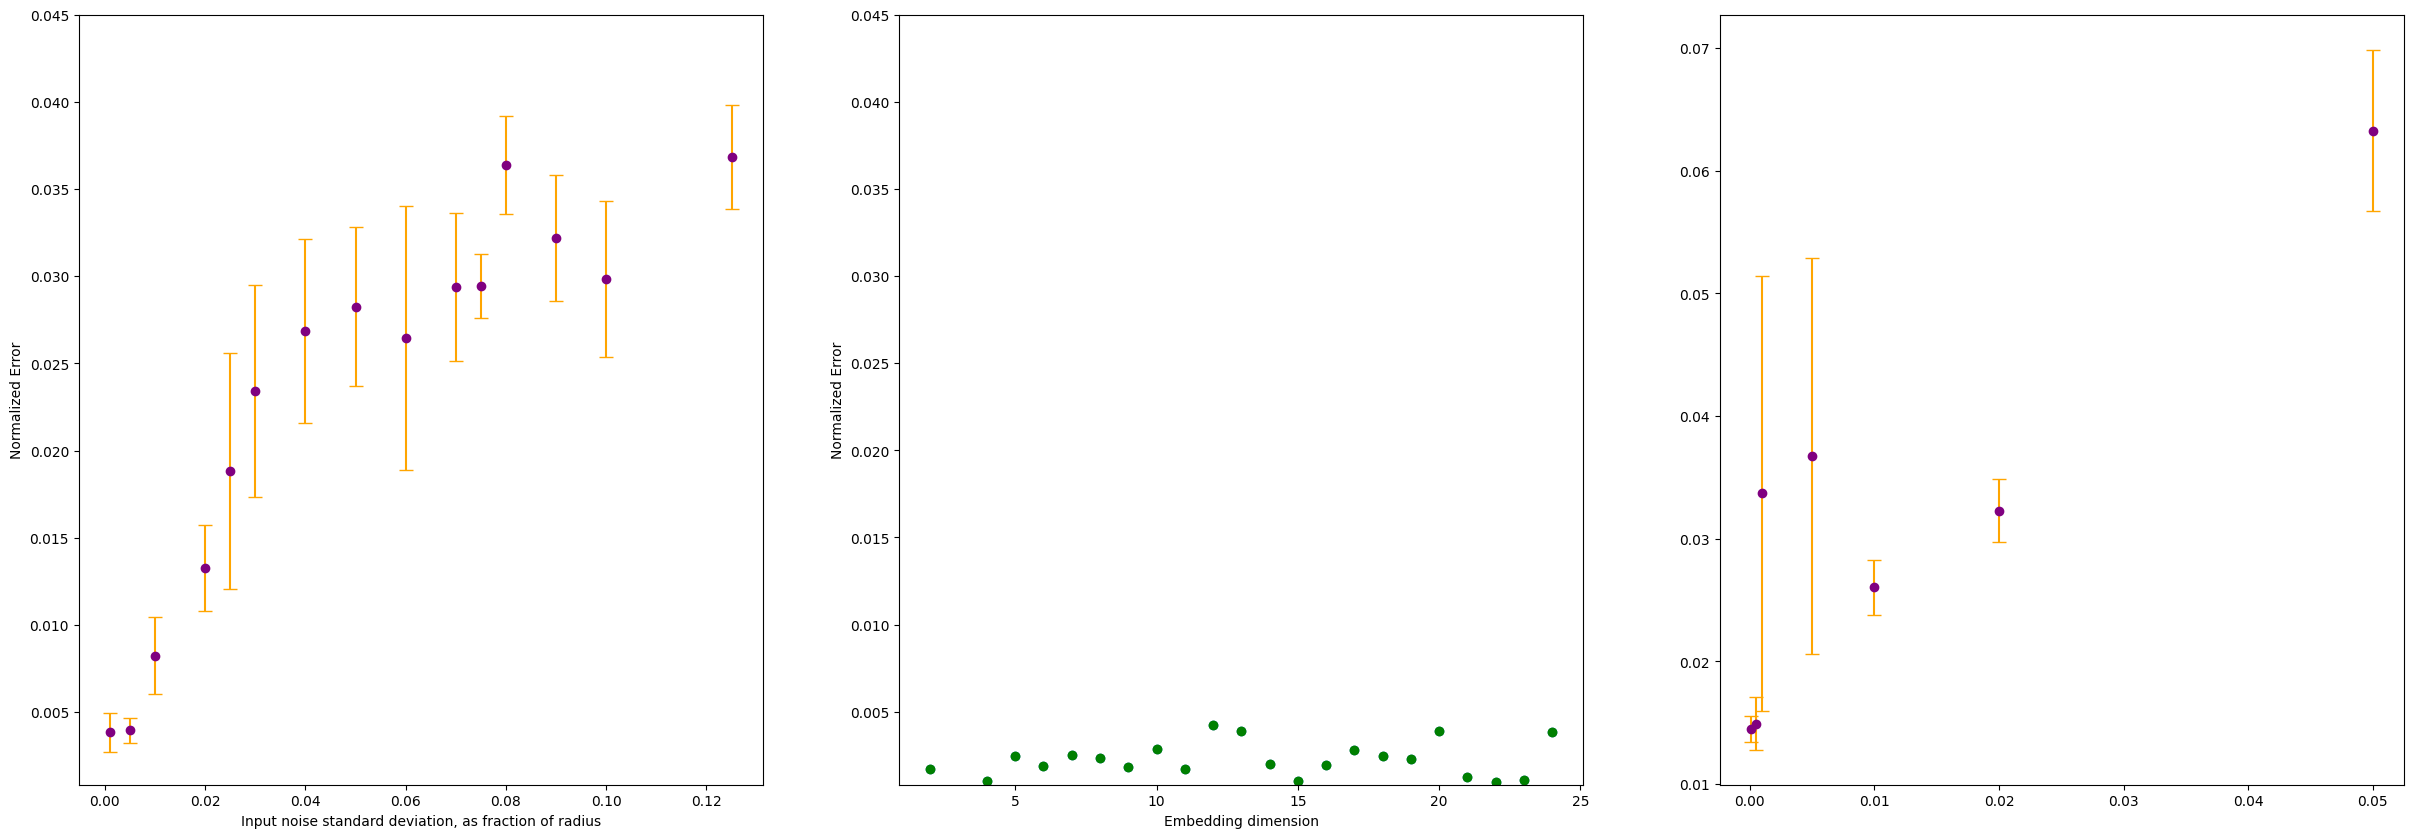

In [233]:
fig = plt.figure(figsize=(30,10))

ax = fig.add_subplot(131)

noise_var = [0.001,0.005,0.01,0.02,0.025,0.03,0.04,0.05,0.06,0.07,0.075,0.08,0.09,0.1,0.125]



error = [0.0038236,0.00393826,0.0082392,0.013263643, 0.018831209,0.023393472,0.026830469,0.028257823,0.026462683,0.029377216,0.029433391,0.036400927,0.032171806,0.029818693,0.036835936]


std = [0.00255255,0.00162342,0.00494583,0.005526395,0.015162444,0.013581833,0.011809724,0.010161061,0.01691731,0.009538343,0.004111763,0.006278068,0.00807038,0.010022126,0.00662975]

std = std/np.sqrt(5)

ax.errorbar(x=noise_var,y=error,yerr=std,fmt="o",ecolor="orange",capsize=5, color="purple")
plt.xlabel("Input noise standard deviation, as fraction of radius")
plt.ylabel("Normalized Error")
plt.ylim(top=0.045)

#plt.savefig("est_theory.svg")
noise_vars2 = [0.02,0.05,0.01,0.005,0.0005,0.001,0.0001]

errors2 = [0.032287827,0.063259569,0.026015801,0.036729573,0.014929154,0.033680042,0.01449421]

stds2 = [0.00579972,0.014732794,0.005003834,0.036167766,0.004776713,0.039667175,0.002329629]/np.sqrt(5)

axs2 = fig.add_subplot(133)

axs2.errorbar(x=noise_vars2,y=errors2,yerr=stds2, fmt="o", color="purple", ecolor="orange", capsize=5)


ax3 = fig.add_subplot(132)

ax3.scatter(ed,error_ed)

ax3.set_xlabel("Input noise standard deviation, as fraction of radius")
plt.ylabel("Normalized Error")


ax3.scatter(ed,error_ed, color="green")
plt.ylim(top=0.045)
plt.xlabel("Embedding dimension")
plt.ylabel("Normalized Error")


plt.savefig("error.svg")

In [230]:
len(errors2[:-1])

6